In [1]:
# set working dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc

In [3]:
def drawplot(path):
    # get df
    df = pd.read_csv(path)
    # get info
    if path.split("/")[2] == "sp":
        prob = "Shortest Path"
    if path.split("/")[2] == "ks":
        prob = "2D Knapsack"
    if path.split("/")[2] == "tsp":
        prob = "Traveling Salesman"
    if path.split("-")[1] == "spo":
        mthd = "SPO+"
    if path.split("-")[1] == "bb":
        mthd = "DBB"
    # get col
    colnames = {}
    for col in df.columns:
        if col[-9:] == " - Regret":
            colnames[int(col[-10])] = col
    # color map
    cset =  tc.tol_cset('muted')
    colors = [cset.rose, cset.indigo, cset.green, cset.sand, cset.cyan]
    # line styles
    styles = ["-", "--", ":", "-.", (0, (2, 1))]
    # model name
    lbs = [mthd, "{} 16".format(mthd), "{} 64".format(mthd), "{} 16×16".format(mthd), "{} 64×64".format(mthd)]
    models = []
    # draw plot
    fig = plt.figure(figsize=(16,8))
    for i in range(5):
        col = colnames[i+1]
        series = df[["Relative Time (Process)", col]].dropna()
        c = colors[i]
        ls = styles[i]
        lb = lbs[i]
        plt.plot(series["Relative Time (Process)"], series[col], color=c, linewidth=5, alpha=0.7, linestyle=ls, label=lb)
    # labels and ticks
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel("Process Time (Sec)", fontsize=36)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.title("{} for {}\n \
               Epoch = 80, Training Set Size = 1000,\n \
               Polynomial Degree = 4, Noise Half−width = 0.5".format(prob, mthd),
              fontsize=30)
    plt.legend(fontsize=22, labelspacing=0.2, loc=1)
    # save
    plt.show()
    fig.savefig("./images/nn-{}-{}.pdf".format(path.split("/")[2], path.split("-")[1]), dpi=300)

## Shortest Path 

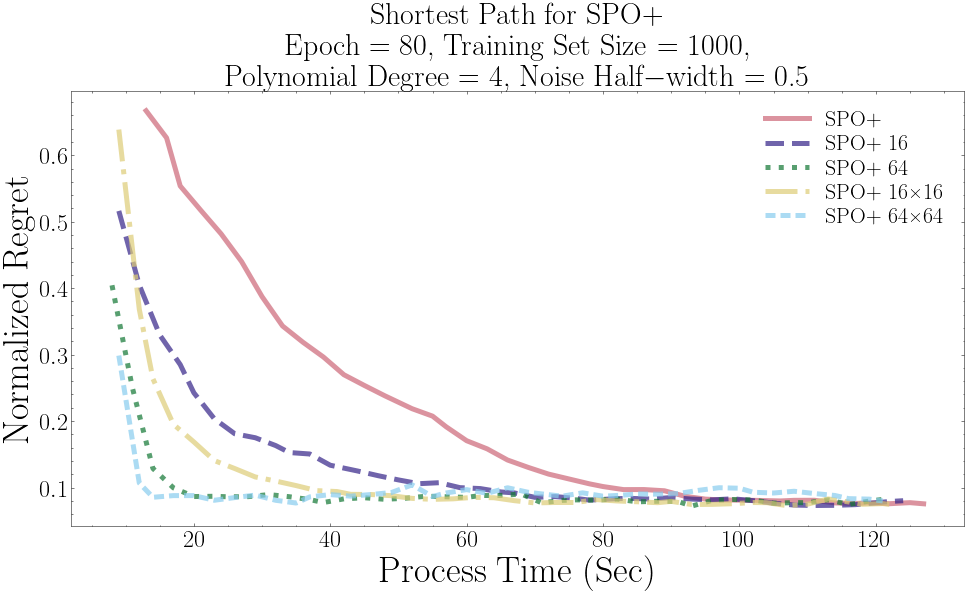

In [4]:
drawplot("./res/sp/h5w5/wandb_export_sp-spo-d1000p4e0.5_eval_time.csv")

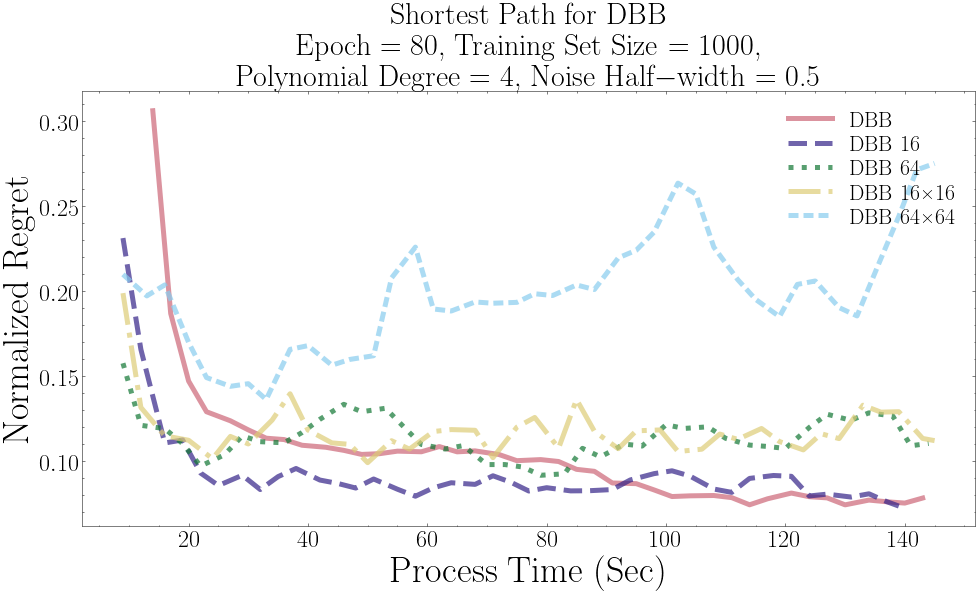

In [5]:
drawplot("./res/sp/h5w5/wandb_export_sp-bb-d1000p4e0.5_eval_time.csv")

## Knapsack 

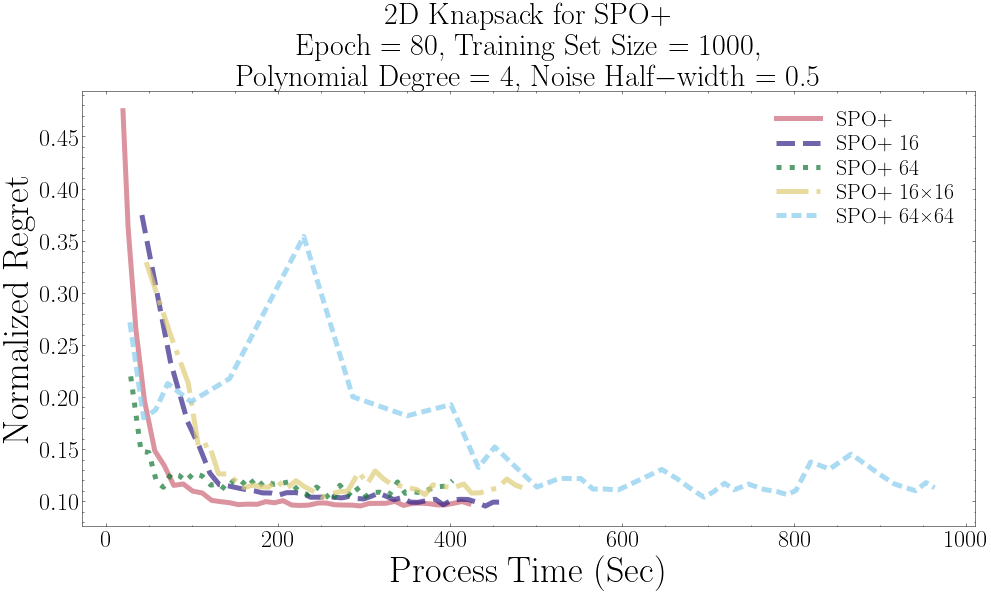

In [6]:
drawplot("./res/ks/i32d2c20/wandb_export_ks-spo-d1000p4e0.5_eval_time.csv")

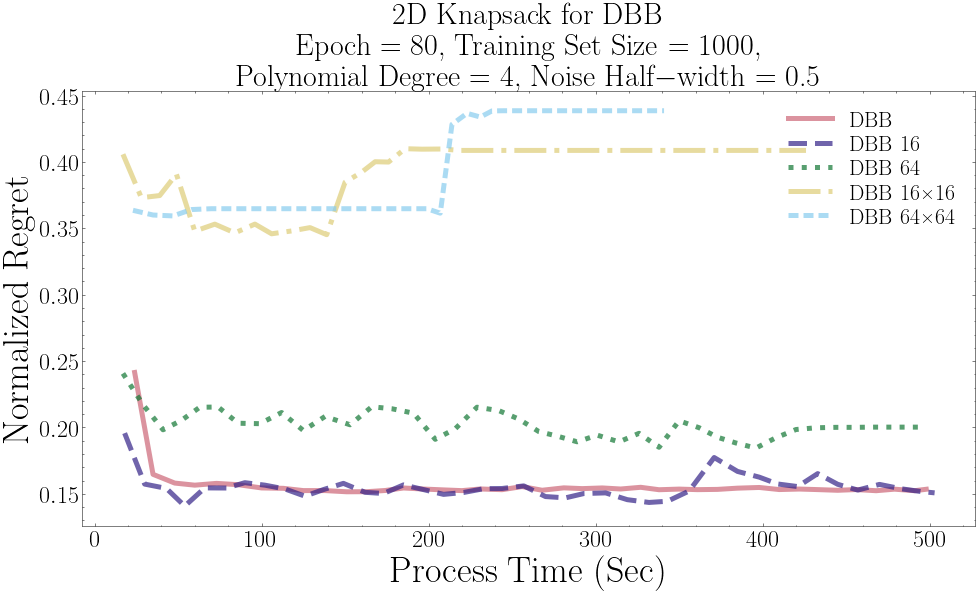

In [7]:
drawplot("./res/ks/i32d2c20/wandb_export_ks-bb-d1000p4e0.5_eval_time.csv")

## TSP 

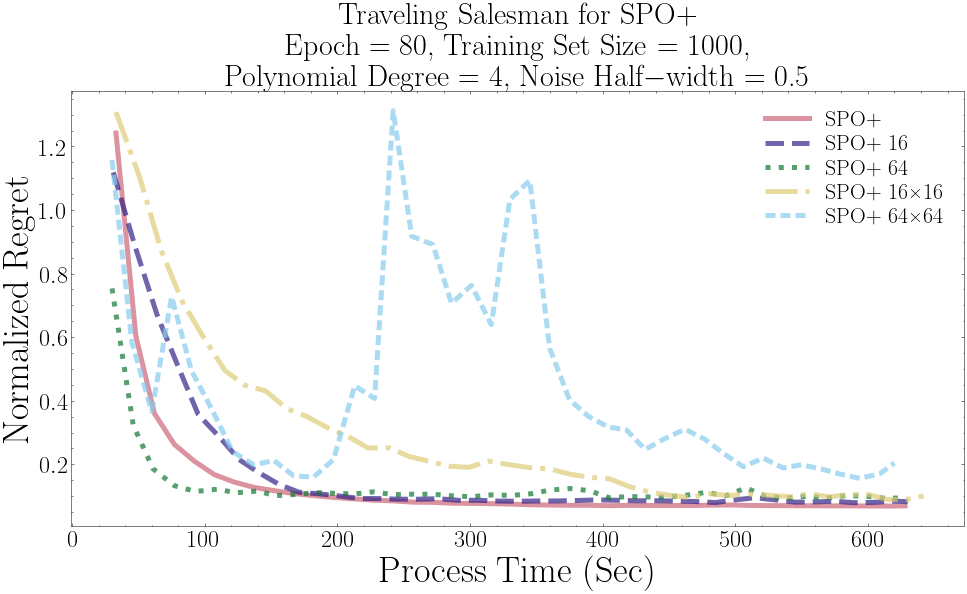

In [8]:
drawplot("./res/tsp/n20/dfj/wandb_export_tsp-spo-d1000p4e0.5_eval_time.csv")

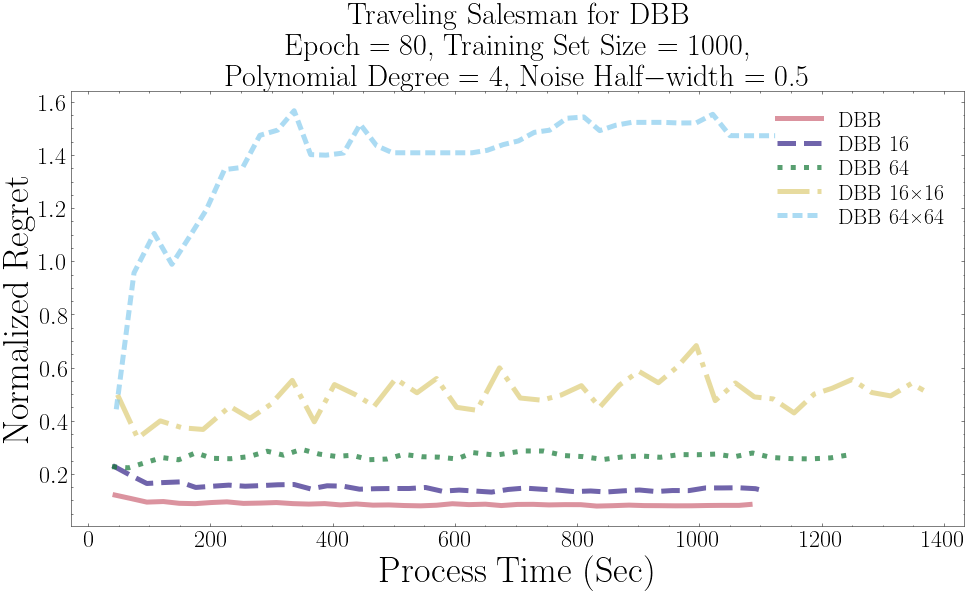

In [9]:
drawplot("./res/tsp/n20/dfj/wandb_export_tsp-bb-d1000p4e0.5_eval_time.csv")